In [1]:
"""Stochastic epidemics on networks. Actual epidemics involve discrete events of infection and recovery. In this exercise we will simulate these discrete events and compare the results with the theoretical results summarized on Box 10.7 which are obtained using a continuous approximation.
(a) Generate a random network (ER) with average degree k ̄ = 5 and at least N = 1000 nodes. Limit the network to its largest connected component.
(b) Fix the recovery rate at μ = 0.1. At the epidemic threshold, the infection rate has a specific value βc. Find βc.
(c) For 10 values of β from 0.5βc to 1.5βc simulate the SIS model stochastically:
i. Initialize the system with Ns = 0.1N seed nodes infected and the rest susceptible.
ii. For each time-step, sweep through the network. For infected nodes, switch them to susceptible with probability μ. For susceptible nodes, check their neighbors. For each neighbor that is infected, switch the susceptible node to infected with probability β. (Note that susceptible node i gets up to ki chances to become infected). Record the network state after each time- step/sweep. End the simulation if there are no more infected nodes (absorbing state) or t reaches tmax which should be no less than 500 in your simulation. t = tmax means the pandemic state has been reached. Execute no less than M = 50 trials for each value of β,re-initializing at random each time.
iii. For each value of β, plot the number of infected nodes at each time step. You should have M curves per plot.
iv. Plot the lifetimes of the epidemics as a function of β. For every value of β you will have atleast 50 lifetimes (according to the number of trials you ran). Plot the average lifetime as a function of beta. Add a vertical line at β = βc. What happens at βc? How is this result different than what you obtained with the continuous models described in the book"""
import networkx as nx
import pylab as plt
import numpy as np
import math
import pygraphviz 
from networkx.drawing.nx_agraph import graphviz_layout
import random
import array as arr  
import EoN
import pandas as pd

In [222]:
#Given n and <k>, we calculate the edge probability,p for a random undirected graph
#Expected degree of a vertex = d = average degree
#For average degree = d > 1, prob(giant component) is almost 1. Here, 
avgK = 5
n = 1000
#No. of edges in the undirected graph
L = (n*avgK)/2
d = avgK
#(n-1) to avoid self loops
p = avgK/(n-1)
print("\nProbability of edge creation =","%0.3f"%(p))


Probability of edge creation = 0.005


In [223]:
#Generating the random graph with <k>=5 and p
g = nx.erdos_renyi_graph(n,p,seed = 200)
#nx.draw_random(g,with_labels=False)
#plt.show()

#Checking once if the graph generated is correct
sum = 0
for node in g.nodes():
    sum = sum + (g.degree(node))
print("\nAverage Degree =","%0.0f"%(sum/n))




Average Degree = 5


In [224]:
# p value at which giant component (of size log(n) nodes) is expected
p_giant = 1.0 / (n - 1)
# p value at which graph is expected to become completely connected. Largest connected component will be the entire graph at this probility of edge creation
p_conn = math.log(n) / float(n)

#All connected components Gcc 
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
#The largest connected component G0
G0 = g.subgraph(Gcc[0])
n0 = G0.order()
L0 = G0.size()
print("\nNumber of nodes that remain connected indirectly in the largest component = ", n0)
print("\nNumber of links in the largest connected component = ", L0)
print("\np value at which giant component (of size log(n) nodes) is expected = ", "%0.4f"%(p_giant))
print("p value at which graph is expected to become completely connected = ", "%0.4f"%(p_conn))
print("p value of current random graph =", "%0.4f"%(p))
    


Number of nodes that remain connected indirectly in the largest component =  998

Number of links in the largest connected component =  2489

p value at which giant component (of size log(n) nodes) is expected =  0.0010
p value at which graph is expected to become completely connected =  0.0069
p value of current random graph = 0.0050


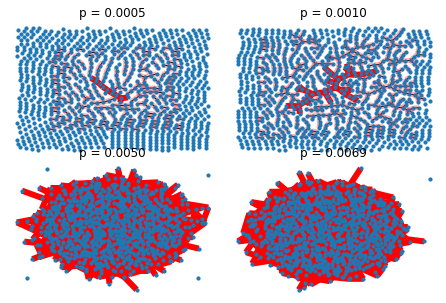

In [225]:
#Self Understanding: Evolution of the largest component with varying p
try:
    import matplotlib.pyplot as plt
except:
    raise

import networkx as nx
import math

try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
    layout = graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
        layout = graphviz_layout
    except ImportError:
        print("PyGraphviz and pydot not found;\n"
              "drawing with spring layout;\n"
              "will be slow.")
        layout = nx.spring_layout


# the following range of p values should be close to the threshold
pvals=[(p_giant-0.0005), p_giant, p, p_conn]

region=220 # for pylab 2x2 subplot layout
plt.subplots_adjust(left=0,right=1,bottom=0,top=0.95,wspace=0.05,hspace=0.05)
for p in pvals:
    G=nx.erdos_renyi_graph(n,p,seed=123)
    pos=layout(G)
    region+=1
    plt.subplot(region)
    plt.title("p = %6.4f"%(p))
    nx.draw(G,pos,
            with_labels=False,
            node_size=10
            )
    # identify largest connected component
    Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    G0=Gcc[0]
    nx.draw_networkx_edges(G0,pos,
                           with_labels=False,
                           edge_color='r',
                           width=6.0
                        )
    # show other connected components
    for Gi in Gcc[1:]:
       if len(Gi)>1:
          nx.draw_networkx_edges(Gi,pos,
                                 with_labels=False,
                                 edge_color='r',
                                 alpha=0.3,
                                 width=5.0
                                 )
plt.savefig("giant_component.png")
plt.show() # display

In [226]:
#Average degree of largest connected component, (2*L0/n0)
sum_G0 = 0
for node in G0.nodes():
    sum_G0 = sum_G0 + (G0.degree(node))
avgK0 = (sum_G0/n0)
print("\nAverage Degree =","%0.3f"%(avgK0))


Average Degree = 6.786


In [228]:
#Let us consider only the largest connected component in our graph, G0
#Epidemic threshold, lambdaC (<k>/<k^2>)=1/(<k> + 1)
lambdaC = 1/(avgK0 + 1)
print("Epidemic Threshold = ", "%0.3f"%(lambdaC), ". A random network always has a nonzero epidemic threshold")
#Spreading rate, lambda
#recovery rate, mu
#infection rate, beta
#lambda=beta/mu
#infection rate at epidemic threshold, betaC if mu=0.1
mu=0.1
betaC = lambdaC*mu
print("4(b) Infection rate at epidemic threshold = ", "%0.3f"%(betaC))

Epidemic Threshold =  0.128 . A random network always has a nonzero epidemic threshold
4(b) Infection rate at epidemic threshold =  0.013


In [357]:
#Obtaining 10 random values between the 0.5betaC and 1.5betaC
lowLim = 0.5*betaC
upLim = 1.5*betaC
beta_range = []
for i in range(1, 11):
    beta_range.append("%0.4f"%(random.uniform(lowLim, upLim)))
print(beta_range)

['0.0179', '0.0176', '0.0183', '0.0184', '0.0162', '0.0112', '0.0124', '0.0134', '0.0163', '0.0097']


In [401]:
#seed nodes infected
Ns=0.1*n0
print("\n4c(i) Number of initially infected individuals=",Ns)
tmax = 500
iterations = 50  #M trials
#tau = beta     #beta,transmission rate
gamma = 0.1      #mu,recovery rate
rho = 0.1         #random fraction initially infected
print("4c(ii)","\ntmax=",tmax,"\nM=",iterations,"\nrecovery rate=",mu,"\nFraction initially infected=",rho,"\nInfection rate, beta will be randomly generated")


4c(i) Number of initially infected individuals= 99.80000000000001
4c(ii) 
tmax= 500 
M= 50 
recovery rate= 0.1 
Fraction initially infected= 0.1 
Infection rate, beta will be randomly generated


4c(iii)


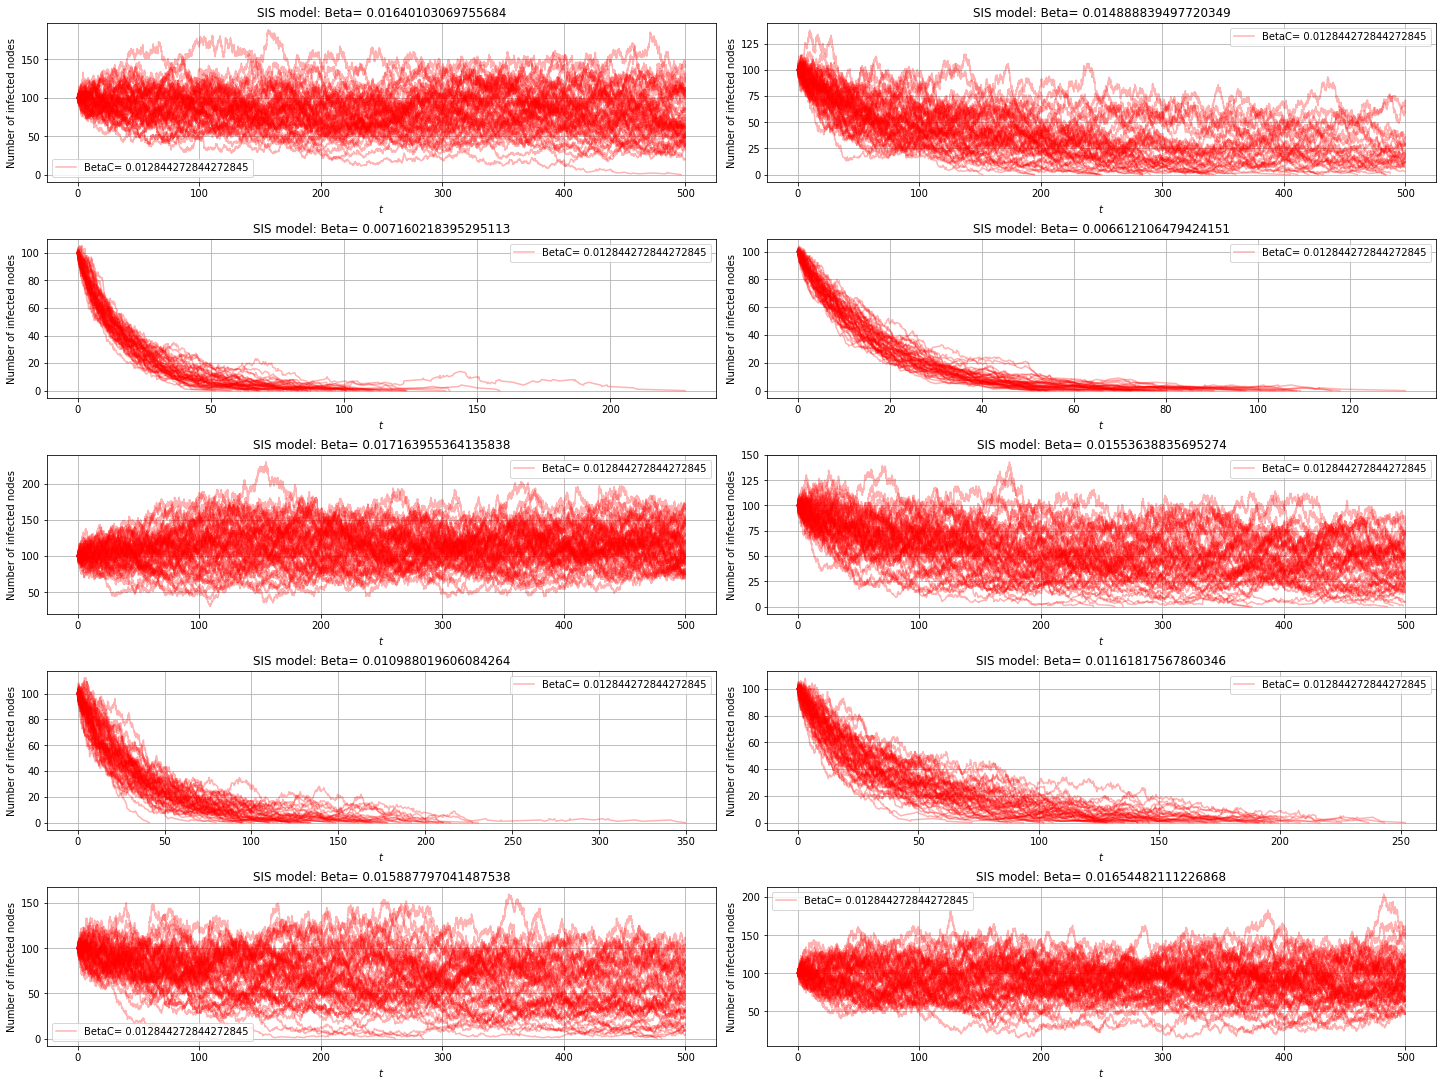

In [402]:
#4c(iii)
fig, axs = plt.subplots(5, 2, figsize=(20, 15), constrained_layout=True)
for ax in axs.flat:
    tau=random.uniform(lowLim, upLim)
    for counter in range(iterations):
        t, S, I = EoN.fast_SIS(G0, tau, gamma, rho = rho, tmax = tmax)
        if counter == 0:
            ax.plot(t, I, color = 'red', alpha=0.3, label='BetaC= {}'.format(betaC))
        ax.plot(t, I, color = 'red', alpha=0.3)
        #ax.suptitle('SIS model: Beta= {}'.format(tau))
        #ax.title('BetaC= {}'.format(betaC))
    ax.set_xlabel('$t$')
    ax.set_ylabel('Number of infected nodes')
    ax.set_title('SIS model: Beta= {}'.format(tau))
    ax.grid()
    ax.legend()
fig.set_constrained_layout_pads(w_pad=4./72., h_pad=4./72.,
        hspace=0., wspace=0.)

In [ ]:
print("For beta values musch less than betaC, the number of infected individuals decays exponentially. \n However, as beta increases and exceeds betaC, the number of infected individuals keeps fluctuating around a mean value with a long epidemic lifetime")

In [429]:
average_lifetime=[0] * 50
tau_list=[0] * 50
#fig, axs = plt.subplots(5, 2, figsize=(20, 15), constrained_layout=True)
#for ax in axs.flat:
for i in range(0, 50):
    tau=random.uniform(lowLim, upLim)
    tau_list[i]=tau
    lifetime=0
    for counter in range(iterations):
        t, S, I = EoN.fast_SIS(G0, tau, gamma, rho = rho, tmax = tmax)
        lifetime = (lifetime + max(t))
    average_lifetime[i]=lifetime/iterations
        #lifetimes[i] = t
        
        

Text(0.012944272844272844, 500, 'betaC')

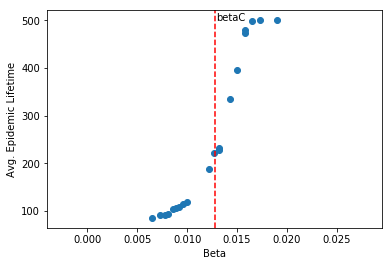

In [440]:
plt.scatter(tau_list, average_lifetime)
plt.xlabel("Beta")
plt.ylabel("Avg. Epidemic Lifetime")
plt.axvline(x=betaC, color='red', linestyle='--')
plt.text(betaC+0.0001,500,'betaC')

In [ ]:
print("\nOnce the beta value exceeds betaC, the average lifetime of the epidemic sharply increases. \nThe epidemic will rage on for a longer duration once the ratio of the infection rate to that of the recovery rate exceeds the epidemic threshold. \nThis is also very clear from the plots that we made at different beta values around betaC")

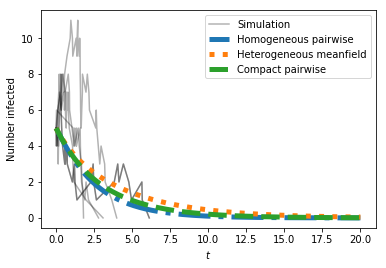

In [451]:
tmax = 20
iterations = 5  #run 5 simulations
tau = 0.1       #transmission rate
gamma = 1.0    #recovery rate
rho = 0.005 

plt.clf()
N=10**4
for counter in range(iterations):
    t, S, I = EoN.fast_SIS(G0, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)

#Now compare with ODE predictions.  Read in the degree distribution of G
#and use rho to initialize the various model equations.
#There are versions of these functions that allow you to specify the
#initial conditions rather than starting from a graph.

#we expect a homogeneous model to perform poorly because the degree
#distribution is very heterogeneous
t, S, I = EoN.SIS_homogeneous_pairwise_from_graph(G0, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)

t, S, I = EoN.SIS_heterogeneous_meanfield_from_graph(G0, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)

t, S, I = EoN.SIS_compact_pairwise_from_graph(G0, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, '--', label = 'Compact pairwise', linewidth = 5)

plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()

In [ ]:
print("\nWe can see that the dicrete simulation is much more dynamic than the continuous simulations for the SIS model.")
print("\nAlso, the epidemic threshold calculated from the ratio of infection rate and recovery rate should be ideally independant of their individual values.\nYet, at high infection rates and high recovery rates, though the lambda ration remains the same, we see that the epidemic threshold decreases.\nThis could be misleading as it is not reflective of the real nature of epidemics.\nTherefore,the accuracy of the discrete-time approach decreases as μ and β increase.")